<a href="https://colab.research.google.com/github/AdrieleMagistro/demo-nodejs-mongodb-rest/blob/master/Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

# rank1_tensor = tf.Variable(["Test"], tf.string)
# rank2_tensor = tf.Variable(["test", "ok"], ["test", "yes"], tf.string)

# rank1_tensor.shape

# tensor1 = tf.ones([1,2,3])
# tensor2 = tf.reshape(tensor1, [2,3,1])
# tensor3 = tf.reshape(tensor2, [3,-1])

# t = tf.zeros([5,5,5,5])
# print(t)
# t = tf.reshape(t, [125, -1])
# print(t)

# **Linear Regression**

Import

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [0]:
# Load dataset.
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv") # Training data
dfeval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv") # Testing data


y_train = dftrain.pop('survived')
y_eval = dfeval.pop("survived")

In [5]:
print(dftrain.loc[0], y_train.iloc[0])

dftrain.describe()
# dftrain.shape
# 627 rows, 9 columns = attributes

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


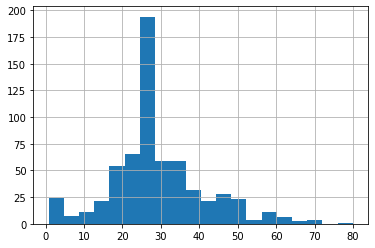

In [6]:
dftrain.age.hist(bins=20)

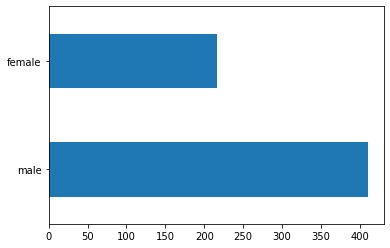

In [7]:
dftrain.sex.value_counts().plot(kind='barh')

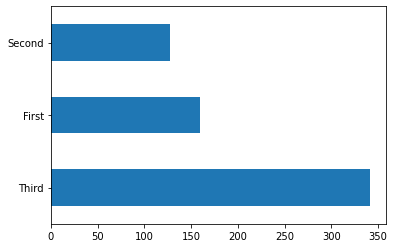

In [8]:
dftrain["class"].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

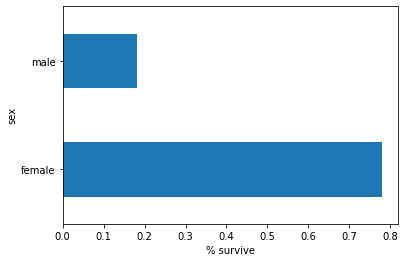

In [9]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

Text(0.5, 0, '% survive')

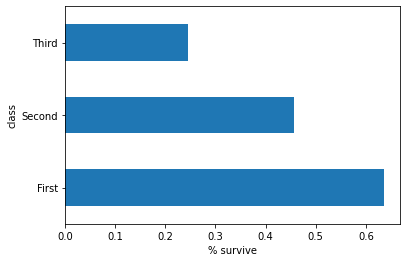

In [10]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [11]:
dfeval.shape

(264, 9)

In [12]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() # gets a list of all unique values from given features column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
    
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [13]:
dftrain["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [14]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

# Training
linear_est.train(train_input_fn)
result =linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

0.75757575


In [15]:
result

{'accuracy': 0.75757575,
 'accuracy_baseline': 0.625,
 'auc': 0.82868075,
 'auc_precision_recall': 0.7708999,
 'average_loss': 0.48640406,
 'global_step': 200,
 'label/mean': 0.375,
 'loss': 0.47962773,
 'precision': 0.6635514,
 'prediction/mean': 0.40230417,
 'recall': 0.7171717}

In [16]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[5])
print(y_eval.loc[5])
print(result[5]['probabilities'][1])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwaved0mi/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                       female
age                           15
n_siblings_spouses             0
parch                          0
fare                      8.0292
class                      Third
deck                     unknown
embark_tow

# **Classification**

In [0]:
# Import
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd

In [0]:
CSV_COLUMNS_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


In [0]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
)
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMNS_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMNS_NAMES, header=0)

In [56]:
train.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [57]:
train_y = train.pop('Species')
test_y = test.pop('Species')

train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [60]:
train.shape

(120, 4)

In [61]:
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [0]:
def input_fn(features, labels, training=True, batch_size=256):
  # convert the input to a dataset.
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  # Shuffle and repeat if you are in training mode.
  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [67]:
# Feature columns describe how to use the input
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


We are ready to choose a model. For classification tasks there are varitety of different estimatros/models that we can pick from. some options are listed below.


*   DNNClassifier (Deep Neural Network)
*   LinearClassifier

We can choose either model but the DNN seems to be the best choice. This is because we may not be able to find a linear coorespondence in our data.



In [81]:
# Building a model
# Building a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns, 
                                        # Two hidden layers of 30 and 10 nodes respectively.
                                        hidden_units=[30, 10], 
                                        # The model must choose between 3 classes.
                                        n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8yhod862', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [82]:
# Training

classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)



TypeError: ignored

In [70]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-09T15:02:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp4d5u6pn0/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.22369s
INFO:tensorflow:Finished evaluation at 2020-04-09-15:02:43
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9, average_loss 

In [86]:
def input_fn(features, batch_size=256):
  # convert the input to a dataset.
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
  
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
  print(pred_dict)
  class_id = pred_dict['class_ids'][0]
  probability = pred_dict['probabilities'][class_id]

  print('Prediction is "{}" ({:.1f}%)'.format(
      SPECIES[class_id], 100 * probability
  ))

Please type numeric values as prompted.
SepalLength: 6.9
SepalWidth: 3.1
PetalLength: 5.4
PetalWidth: 2.1
INFO:tensorflow:Could not find trained model in model_dir: /tmp/tmp8yhod862, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([0.97071254, 2.4878    , 1.2014042 ], dtype=float32), 'probabilities': array([0.14666201, 0.6686215 , 0.18471654], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1, 2], dtype=int32), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "Versicolor" (66.9%)


# **Clustering**